In [127]:
class Correlator:
    
    def __init__(self):
        self.image = None
        self.filter = None

    def __padding(self, horizontal_padding, vertical_padding):
        padded_image = np.zeros((self.image.shape[0] + 2 * vertical_padding, self.image.shape[1] + 2 * horizontal_padding, 3))
        padded_image[vertical_padding : -vertical_padding, horizontal_padding : -horizontal_padding, :] = self.image 

        return padded_image
        
        
    def apply_correlation(self, image_path, filter_matrix, zero_padding = True):
        self.original_image = np.asarray(Image.open(image_path).convert('RGB'))
        self.image = self.original_image
        self.filter = filter_matrix
        
        horizontal_padding = self.filter.shape[0]//2
        vertical_padding = self.filter.shape[1]//2
        output = np.zeros((self.image.shape[0], self.image.shape[1], 3))
        

        print(f"{horizontal_padding} and {vertical_padding}")
        if zero_padding:
            self.image  = self.__padding(horizontal_padding, vertical_padding)
            
        for i in range(self.image.shape[0] - self.filter.shape[0]):
            for j in range(self.image.shape[1] - self.filter.shape[1]):
                for k in range(3):
#                     print(i , j , k)
#                     print(i + self.filter.shape[0], j + self.filter.shape[1])
                    output[i,j,k] = np.sum(np.multiply(self.filter, self.image[i: i + self.filter.shape[0], j: j + self.filter.shape[1], k]))
            
        return self.original_image, self.image, output
    
    def apply_norm_correlation(self, image_path, filter_matrix, zero_padding = True):
        self.image = np.asarray(Image.open(image_path).convert('RGB'))
        self.filter = filter_matrix

        if zero_padding:
            padded_image = self.__padding()
                    
        
        return self.image, padded_image

In [168]:
c = Correlator()

filter_matrix = np.ones((9, 9), np.float32)/81
# filter_matrix = np.array([[-1,0,1],
#                          [-2,0,2],
#                          [-1,0,1]])

original, padded_image, output = c.apply_correlation("../app/assets/Imagens_teste/2817540617.jpg", filter_matrix, zero_padding=True)

4 and 4


In [169]:
print(original.shape)
print(padded_image.shape)
print(output.shape)

(2000, 3000, 3)
(2008, 3008, 3)
(2000, 3000, 3)


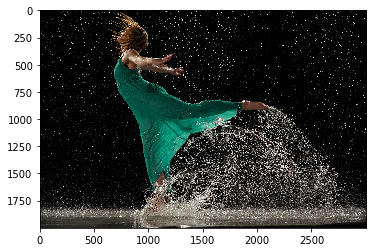

In [170]:
plt.imshow(original.astype(int))

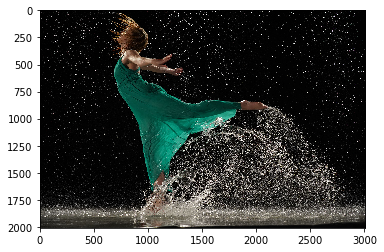

In [171]:
plt.imshow(padded_image.astype(int))

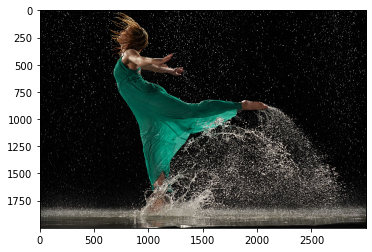

In [172]:
output[output < 0] = 0
output[output > 255] = 255

plt.imshow(output.astype(int))

In [160]:
import cv2

In [161]:
image = cv2.imread("../app/assets/Imagens_teste/2817540617.jpg")

In [162]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

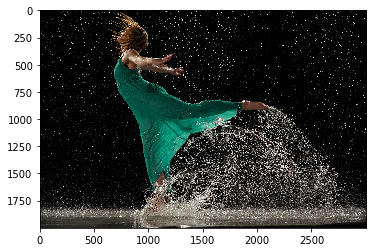

In [163]:
plt.imshow(image)

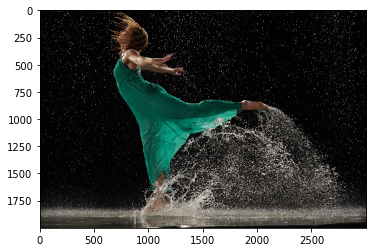

In [165]:
kernel_blur = np.ones((9, 9), np.float32)/81

blurred = cv2.filter2D(image, -1, kernel_blur)
plt.imshow(blurred)

In [167]:
blurred.shape

(2000, 3000, 3)

In [175]:
blurred

array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[27, 26, 22],
        [27, 26, 22],
        [28, 27, 23],
        ...,
        [ 5,  5,  7],
        [ 5,  5,  7],
        [ 5,  5,  7]],

       [[27, 26, 22],
        [27, 26, 22],
        [28, 27, 23],
        ...,
        [ 5,  5,  7],
        [ 5,  5,  7],
        [ 5,  5,  7]],

       [[27, 26, 22],
        [27, 26, 22],
        [28, 27, 23],
        ...,
        [ 5,  5,  7],
        [ 5,  5,  7],
        [ 5,  5,  7]]], dtype=uint8)

In [176]:
output.astype("uint8")

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[11, 11,  9],
        [13, 13, 11],
        [16, 15, 13],
        ...,
        [ 3,  3,  4],
        [ 2,  2,  3],
        [ 0,  0,  0]],

       [[ 9,  9,  8],
        [12, 11,  9],
        [14, 13, 11],
        ...,
        [ 2,  2,  3],
        [ 2,  2,  3],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)